In [12]:
%matplotlib notebook
import numpy as np
import astropy
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from astropy.visualization import (ZScaleInterval, SqrtStretch, ImageNormalize)
import matplotlib.pyplot as plt
import matplotlib
import lsst.daf.persistence as dafPersist
import lsst.geom

In [13]:
cwpRepo = '/home/gkovacs/data/repo_DM-17825/ingested/rerun/proc_2019-02-21'
cwpTemplateRepo = '/home/gkovacs/data/repo_DM-17825/templates'

butlerCwp = dafPersist.Butler(cwpRepo)
butlerCwpTemplate = dafPersist.Butler(cwpTemplateRepo)

In [14]:
# Get the image, make the cutout and show in a bigger cutout
dataId={'visit': 411371, 'ccdnum': 57}
calexp=butlerCwp.get('calexp',dataId=dataId)

In [24]:
ra = 155.27087585
decl = -5.68988946

image_center = lsst.geom.SpherePoint(ra,decl,lsst.geom.degrees)
cutout_extent = lsst.geom.Extent2I(50, 50)

In [25]:
exposure = butlerCwp.get('calexp',dataId=dataId)
cutout = exposure.getCutout(image_center,cutout_extent)
bbox= cutout.getBBox()

 Match the plotted image orientation
 WCSAxes follows the imshow default convention, bottom left image pixel is 0,0 and its corners
 are bottom left -0.5,-0.5; top right 0.5 0.5
 
 See http://docs.astropy.org/en/stable/visualization/wcsaxes/initializing_axes.html

In [26]:
# Match the plotted image orientation
#
# WCSAxes follows the imshow default convention, bottom left image pixel is 0,0 and its corners
# are bottom left -0.5,-0.5; top right 0.5 0.5
#
# See http://docs.astropy.org/en/stable/visualization/wcsaxes/initializing_axes.html
# We'll show A.T[::-1,::-1]
extentR = (bbox.getMaxY()+0.5, bbox.getMinY()-0.5, bbox.getMaxX()+0.5, bbox.getMinX()-0.5)
print(extentR)

(1495.5, 1445.5, 1089.5, 1039.5)


In [1]:
pwd

'/ssd/gkovacs/devel/active/DM-17825'

![Transform and extent](img_transform_extent.png)

In [27]:
A = cutout.getMaskedImage().getImage().getArray()
img_norm = ImageNormalize(A,interval=ZScaleInterval())

# Converting SkyWcs to astropy.wcs.WCS

SkyWcs has a fits metadata representation, that can be converted to a dictionary.

In [29]:
M = cutout.getWcs().getFitsMetadata()
# We'll show the A.T that swaps the axes
W = WCS(M.toDict()).swapaxes(0,1)

In [30]:
W

WCS Keywords

Number of WCS axes: 2
CTYPE : 'DEC--TAN-SIP'  'RA---TAN-SIP'  
CRVAL : -5.686392881856413  155.2908557516832  
CRPIX : 1743.524956  1016.824682  
CD1_1 CD1_2  : -1.2485291485569e-07  -7.2894527279287e-05  
CD2_1 CD2_2  : 7.30983903374267e-05  -1.2922970767026e-08  
NAXIS : 0  0

<IPython.core.display.Javascript object>


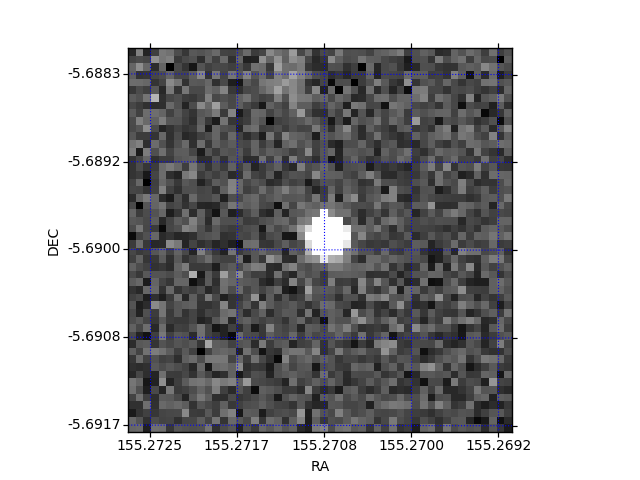

In [32]:
fig = plt.figure()
WA = WCSAxes(fig,rect=(0.1,0.1,0.8,0.8), wcs=W)

# Alternatively, WCSAxes could also swap the image axes, too
# WA = WCSAxes(fig,rect=(0.1,0.1,0.8,0.8),wcs=W,slices=('y','x'))

ax = fig.add_axes(WA)

# extent is ALWAYS [left,right,bottom,top] even for origin='upper'
ax.imshow(A.T[::-1,::-1],cmap='gray',norm=img_norm,origin='lower',extent=extentR)
ax.coords['ra'].set_major_formatter('d.dddd')
ax.coords['dec'].set_major_formatter('d.dddd')

# It is confusing whether coords[0], coords[1] refer to RA or DEC, see astropy #7180
#ax.coords[0].set_axislabel('RA')
#ax.coords[1].set_axislabel('DEC')

ax.set_xlabel('RA')
ax.set_ylabel('DEC')

ax.coords.grid(True,ls='dotted',color='blue')

ax.coords[0].set_ticklabel_position('l') 
ax.coords[1].set_ticklabel_position('b') 


In [ ]:
# Astropy issue #8466
overlay = ax.get_coords_overlay('pixel')